# Data Preprocessing Steps by step

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler  

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"  

In [3]:
df = pd.read_csv('SBAnational.csv', sep=',')
credit = df.copy()
print(type(credit))

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (9) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


<class 'pandas.core.frame.DataFrame'>


# Data Exploration

In [4]:
credit.head(15)  

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
0,1000014003,ABC HOBBYCRAFT,EVANSVILLE,IN,47711,FIFTH THIRD BANK,OH,451120,28-Feb-97,1997,84,4,2.0,0,0,1,0,N,Y,NaN,28-Feb-99,"$60,000.00",$0.00,P I F,$0.00,"$60,000.00","$48,000.00"
1,1000024006,LANDMARK BAR & GRILLE (THE),NEW PARIS,IN,46526,1ST SOURCE BANK,IN,722410,28-Feb-97,1997,60,2,2.0,0,0,1,0,N,Y,NaN,31-May-97,"$40,000.00",$0.00,P I F,$0.00,"$40,000.00","$32,000.00"
2,1000034009,"WHITLOCK DDS, TODD M.",BLOOMINGTON,IN,47401,GRANT COUNTY STATE BANK,IN,621210,28-Feb-97,1997,180,7,1.0,0,0,1,0,N,N,NaN,31-Dec-97,"$287,000.00",$0.00,P I F,$0.00,"$287,000.00","$215,250.00"
3,1000044001,"BIG BUCKS PAWN & JEWELRY, LLC",BROKEN ARROW,OK,74012,1ST NATL BK & TR CO OF BROKEN,OK,0,28-Feb-97,1997,60,2,1.0,0,0,1,0,N,Y,NaN,30-Jun-97,"$35,000.00",$0.00,P I F,$0.00,"$35,000.00","$28,000.00"
4,1000054004,"ANASTASIA CONFECTIONS, INC.",ORLANDO,FL,32801,FLORIDA BUS. DEVEL CORP,FL,0,28-Feb-97,1997,240,14,1.0,7,7,1,0,N,N,NaN,14-May-97,"$229,000.00",$0.00,P I F,$0.00,"$229,000.00","$229,000.00"
5,1000084002,"B&T SCREW MACHINE COMPANY, INC",PLAINVILLE,CT,6062,"TD BANK, NATIONAL ASSOCIATION",DE,332721,28-Feb-97,1997,120,19,1.0,0,0,1,0,N,N,NaN,30-Jun-97,"$517,000.00",$0.00,P I F,$0.00,"$517,000.00","$387,750.00"
6,1000093009,MIDDLE ATLANTIC SPORTS CO INC,UNION,NJ,7083,WELLS FARGO BANK NATL ASSOC,SD,0,2-Jun-80,1980,45,45,2.0,0,0,0,0,N,N,24-Jun-91,22-Jul-80,"$600,000.00",$0.00,CHGOFF,"$208,959.00","$600,000.00","$499,998.00"
7,1000094005,WEAVER PRODUCTS,SUMMERFIELD,FL,34491,REGIONS BANK,AL,811118,28-Feb-97,1997,84,1,2.0,0,0,1,0,N,Y,NaN,30-Jun-98,"$45,000.00",$0.00,P I F,$0.00,"$45,000.00","$36,000.00"
8,1000104006,TURTLE BEACH INN,PORT SAINT JOE,FL,32456,CENTENNIAL BANK,FL,721310,28-Feb-97,1997,297,2,2.0,0,0,1,0,N,N,NaN,31-Jul-97,"$305,000.00",$0.00,P I F,$0.00,"$305,000.00","$228,750.00"
9,1000124001,INTEXT BUILDING SYS LLC,GLASTONBURY,CT,6073,WEBSTER BANK NATL ASSOC,CT,0,28-Feb-97,1997,84,3,2.0,0,0,1,0,N,Y,NaN,30-Apr-97,"$70,000.00",$0.00,P I F,$0.00,"$70,000.00","$56,000.00"


In [5]:
credit.shape

(899164, 27)

In [6]:
credit.isnull().sum()

LoanNr_ChkDgt             0
Name                     14
City                     30
State                    14
Zip                       0
Bank                   1559
BankState              1566
NAICS                     0
ApprovalDate              0
ApprovalFY                0
Term                      0
NoEmp                     0
NewExist                136
CreateJob                 0
RetainedJob               0
FranchiseCode             0
UrbanRural                0
RevLineCr              4528
LowDoc                 2582
ChgOffDate           736465
DisbursementDate       2368
DisbursementGross         0
BalanceGross              0
MIS_Status             1997
ChgOffPrinGr              0
GrAppv                    0
SBA_Appv                  0
dtype: int64

In [7]:
credit = credit.drop_duplicates(keep = 'first')

In [8]:
credit.isnull().sum()  

LoanNr_ChkDgt             0
Name                     14
City                     30
State                    14
Zip                       0
Bank                   1559
BankState              1566
NAICS                     0
ApprovalDate              0
ApprovalFY                0
Term                      0
NoEmp                     0
NewExist                136
CreateJob                 0
RetainedJob               0
FranchiseCode             0
UrbanRural                0
RevLineCr              4528
LowDoc                 2582
ChgOffDate           736465
DisbursementDate       2368
DisbursementGross         0
BalanceGross              0
MIS_Status             1997
ChgOffPrinGr              0
GrAppv                    0
SBA_Appv                  0
dtype: int64

In [9]:
#removing rows with null values from all columns with null values except ChgOffDate column 
credit.dropna(subset=['Name', 'City', 'State', 'BankState', 'NewExist','RevLineCr', 'LowDoc', 'DisbursementDate', 'MIS_Status'], inplace=True)
credit.isnull().sum() 

LoanNr_ChkDgt             0
Name                      0
City                      0
State                     0
Zip                       0
Bank                      0
BankState                 0
NAICS                     0
ApprovalDate              0
ApprovalFY                0
Term                      0
NoEmp                     0
NewExist                  0
CreateJob                 0
RetainedJob               0
FranchiseCode             0
UrbanRural                0
RevLineCr                 0
LowDoc                    0
ChgOffDate           725369
DisbursementDate          0
DisbursementGross         0
BalanceGross              0
MIS_Status                0
ChgOffPrinGr              0
GrAppv                    0
SBA_Appv                  0
dtype: int64

In [10]:
del credit['ChgOffDate']

In [11]:
credit.shape

(886240, 26)

In [12]:
credit.isnull().sum() 

LoanNr_ChkDgt        0
Name                 0
City                 0
State                0
Zip                  0
Bank                 0
BankState            0
NAICS                0
ApprovalDate         0
ApprovalFY           0
Term                 0
NoEmp                0
NewExist             0
CreateJob            0
RetainedJob          0
FranchiseCode        0
UrbanRural           0
RevLineCr            0
LowDoc               0
DisbursementDate     0
DisbursementGross    0
BalanceGross         0
MIS_Status           0
ChgOffPrinGr         0
GrAppv               0
SBA_Appv             0
dtype: int64

In [13]:
#MApping the industry to NAICS Value 
credit['nIndustry'] = credit['NAICS'].astype('str').apply(lambda x: x[:2])

In [14]:
credit.nIndustry.unique()

array(['45', '72', '62', '0', '33', '81', '23', '44', '42', '61', '53',
       '54', '31', '51', '71', '52', '21', '32', '56', '48', '11', '92',
       '22', '49', '55'], dtype=object)

In [15]:
credit['Industry'] = credit['NAICS'].astype('str').apply(lambda x: x[:2])

In [16]:
credit['Industry'] = credit['Industry'].map({
    '11': 'Ag/For/Fish/Hunt',
    '21': 'Min/Quar/Oil_Gas_ext',
    '22': 'Utilities',
    '23': 'Construction',
    '31': 'Manufacturing',
    '32': 'Manufacturing',
    '33': 'Manufacturing',
    '42': 'Wholesale_trade',
    '44': 'Retail_trade',
    '45': 'Retail_trade',
    '48': 'Trans/Ware',
    '49': 'Trans/Ware',
    '51': 'Information',
    '52': 'Finance/Insurance',
    '53': 'RE/Rental/Lease',
    '54': 'Prof/Science/Tech',
    '55': 'Mgmt_comp',
    '56': 'Admin_sup/Waste_Mgmt_Rem',
    '61': 'Educational',
    '62': 'Healthcare/Social_assist',
    '71': 'Arts/Entertain/Rec',
    '72': 'Accom/Food_serv',
    '81': 'Other_no_pub',
    '92': 'Public_Admin'
})


In [17]:
# Remove records where Industry is NaN (NAICS code was a 0)
credit.dropna(subset=['Industry'], inplace=True)

In [18]:
credit.isnull().sum() 

LoanNr_ChkDgt        0
Name                 0
City                 0
State                0
Zip                  0
Bank                 0
BankState            0
NAICS                0
ApprovalDate         0
ApprovalFY           0
Term                 0
NoEmp                0
NewExist             0
CreateJob            0
RetainedJob          0
FranchiseCode        0
UrbanRural           0
RevLineCr            0
LowDoc               0
DisbursementDate     0
DisbursementGross    0
BalanceGross         0
MIS_Status           0
ChgOffPrinGr         0
GrAppv               0
SBA_Appv             0
nIndustry            0
Industry             0
dtype: int64

In [19]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 687973 entries, 0 to 899161
Data columns (total 28 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   LoanNr_ChkDgt      687973 non-null  int64  
 1   Name               687973 non-null  object 
 2   City               687973 non-null  object 
 3   State              687973 non-null  object 
 4   Zip                687973 non-null  int64  
 5   Bank               687973 non-null  object 
 6   BankState          687973 non-null  object 
 7   NAICS              687973 non-null  int64  
 8   ApprovalDate       687973 non-null  object 
 9   ApprovalFY         687973 non-null  object 
 10  Term               687973 non-null  int64  
 11  NoEmp              687973 non-null  int64  
 12  NewExist           687973 non-null  float64
 13  CreateJob          687973 non-null  int64  
 14  RetainedJob        687973 non-null  int64  
 15  FranchiseCode      687973 non-null  int64  
 16  Ur

# Data Cleaning/Removing duplicates and inaccuracies in our dataset

In [20]:
#in the order of columns in the dataset
credit.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 687973 entries, 0 to 899161
Data columns (total 28 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   LoanNr_ChkDgt      687973 non-null  int64  
 1   Name               687973 non-null  object 
 2   City               687973 non-null  object 
 3   State              687973 non-null  object 
 4   Zip                687973 non-null  int64  
 5   Bank               687973 non-null  object 
 6   BankState          687973 non-null  object 
 7   NAICS              687973 non-null  int64  
 8   ApprovalDate       687973 non-null  object 
 9   ApprovalFY         687973 non-null  object 
 10  Term               687973 non-null  int64  
 11  NoEmp              687973 non-null  int64  
 12  NewExist           687973 non-null  float64
 13  CreateJob          687973 non-null  int64  
 14  RetainedJob        687973 non-null  int64  
 15  FranchiseCode      687973 non-null  int64  
 16  Ur

In [21]:
# Remove '$', commas, and extra spaces from records in columns with dollar values that should be floats

credit_copy = credit[['DisbursementGross', 'BalanceGross', 'ChgOffPrinGr', 'GrAppv', 'SBA_Appv']].applymap(lambda x: x.strip().replace('$', '').replace(',', ''))
del credit['DisbursementGross']
del credit['BalanceGross']
del credit['ChgOffPrinGr']
del credit['GrAppv']
del credit['SBA_Appv']

credit = pd.concat([credit, credit_copy],axis =1)
#credit.shape  

In [22]:
# Change the type of NewExist to an integer, Zip and UrbanRural to str (categorical) and all currency-related fields to float values
credit = credit.astype({'Zip': 'str', 'NewExist': 'int64', 'UrbanRural': 'str', 'DisbursementGross': 'float', 'BalanceGross': 'float',
                          'ChgOffPrinGr': 'float', 'GrAppv': 'float', 'SBA_Appv': 'float'})

# Check to see dtypes so far
credit.info() 


<class 'pandas.core.frame.DataFrame'>
Int64Index: 687973 entries, 0 to 899161
Data columns (total 28 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   LoanNr_ChkDgt      687973 non-null  int64  
 1   Name               687973 non-null  object 
 2   City               687973 non-null  object 
 3   State              687973 non-null  object 
 4   Zip                687973 non-null  object 
 5   Bank               687973 non-null  object 
 6   BankState          687973 non-null  object 
 7   NAICS              687973 non-null  int64  
 8   ApprovalDate       687973 non-null  object 
 9   ApprovalFY         687973 non-null  object 
 10  Term               687973 non-null  int64  
 11  NoEmp              687973 non-null  int64  
 12  NewExist           687973 non-null  int64  
 13  CreateJob          687973 non-null  int64  
 14  RetainedJob        687973 non-null  int64  
 15  FranchiseCode      687973 non-null  int64  
 16  Ur

In [23]:
credit['BankState'].unique()

array(['OH', 'IN', 'DE', 'AL', 'FL', 'GA', 'OR', 'MN', 'NC', 'MS', 'SD',
       'SC', 'TX', 'LA', 'IA', 'CA', 'TN', 'VA', 'MA', 'RI', 'PA', 'MO',
       'WA', 'UT', 'IL', 'KS', 'WI', 'NJ', 'CT', 'MD', 'NY', 'NH', 'ND',
       'MT', 'MI', 'CO', 'WY', 'OK', 'KY', 'ME', 'NM', 'DC', 'NV', 'NE',
       'WV', 'AZ', 'ID', 'AR', 'VT', 'HI', 'AK', 'PR', 'GU', 'AN', 'VI'],
      dtype=object)

In [24]:
#Removing the nan value from bankstate

credit = credit[credit.BankState != 'nan']

In [25]:
credit['BankState'].unique()

array(['OH', 'IN', 'DE', 'AL', 'FL', 'GA', 'OR', 'MN', 'NC', 'MS', 'SD',
       'SC', 'TX', 'LA', 'IA', 'CA', 'TN', 'VA', 'MA', 'RI', 'PA', 'MO',
       'WA', 'UT', 'IL', 'KS', 'WI', 'NJ', 'CT', 'MD', 'NY', 'NH', 'ND',
       'MT', 'MI', 'CO', 'WY', 'OK', 'KY', 'ME', 'NM', 'DC', 'NV', 'NE',
       'WV', 'AZ', 'ID', 'AR', 'VT', 'HI', 'AK', 'PR', 'GU', 'AN', 'VI'],
      dtype=object)

In [26]:
credit['ApprovalFY'].unique()

array([1997, 2006, 1998, 1999, 2000, 2001, 2003, 2004, 2005, 1984, 2007,
       1987, 2008, 1988, 2009, 1989, 1990, 2010, 1991, 2011, 1992, 2002,
       2012, 1993, 2013, 1994, 2014, '2004', '1994', '1995', '2005',
       '1996', 1996], dtype=object)

In [27]:

def clean_str(x):
    if isinstance(x, str):
        return x.replace('A', '')
    return x


credit['ApprovalFY'] = credit['ApprovalFY'].apply(clean_str).astype('int64')

In [28]:
credit['ApprovalFY'].unique() 

array([1997, 2006, 1998, 1999, 2000, 2001, 2003, 2004, 2005, 1984, 2007,
       1987, 2008, 1988, 2009, 1989, 1990, 2010, 1991, 2011, 1992, 2002,
       2012, 1993, 2013, 1994, 2014, 1995, 1996])

In [29]:
credit['FranchiseCode'].unique() 

array([    1, 15100, 10656, ..., 16452, 35618, 18701])

In [30]:
credit['UrbanRural'].unique()  

array(['0', '1', '2'], dtype=object)

In [31]:
##some of the fields that are considered flags already but aren't necessarily in a useable format right now. 
#These include the NewExist, RevLineCr, LowDoc, and MIS_Status fields.  

In [32]:
credit['NewExist'].unique()  

array([2, 1, 0])

In [33]:
# Keep records where NewExist == 1 or 2
credit = credit[(credit['NewExist'] == 1) | (credit['NewExist'] == 2)]

In [34]:
# Create NewBusiness field where 0 = Existing business and 1 = New business; based on NewExist field
credit.loc[(credit['NewExist'] == 1), 'NewBusiness'] = 0
credit.loc[(credit['NewExist'] == 2), 'NewBusiness'] = 1

#see that a new column New Business is created
credit.info()  

<class 'pandas.core.frame.DataFrame'>
Int64Index: 687246 entries, 0 to 899161
Data columns (total 29 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   LoanNr_ChkDgt      687246 non-null  int64  
 1   Name               687246 non-null  object 
 2   City               687246 non-null  object 
 3   State              687246 non-null  object 
 4   Zip                687246 non-null  object 
 5   Bank               687246 non-null  object 
 6   BankState          687246 non-null  object 
 7   NAICS              687246 non-null  int64  
 8   ApprovalDate       687246 non-null  object 
 9   ApprovalFY         687246 non-null  int64  
 10  Term               687246 non-null  int64  
 11  NoEmp              687246 non-null  int64  
 12  NewExist           687246 non-null  int64  
 13  CreateJob          687246 non-null  int64  
 14  RetainedJob        687246 non-null  int64  
 15  FranchiseCode      687246 non-null  int64  
 16  Ur

In [35]:
credit['RevLineCr'].unique()

array(['N', 'Y', '0', 'T', '`', ',', '1', 'C', '2', 'R', '7', 'A', '-',
       'Q'], dtype=object)

In [36]:

credit= credit[(credit.RevLineCr == 'Y') | (credit.RevLineCr =='N')]
cleanup_revline = {'RevLineCr':     {'Y': 1, 'N': 0}}
credit.replace(cleanup_revline, inplace=True)



In [37]:
credit['RevLineCr']

0         0
1         0
2         0
5         0
7         0
         ..
899145    1
899146    0
899157    0
899160    1
899161    0
Name: RevLineCr, Length: 458730, dtype: int64

In [38]:
credit['RevLineCr'].unique()

array([0, 1])

In [39]:
#lowdoc 
credit['LowDoc'].unique()

array(['Y', 'N', 'C', '1', 'S', 'R', 'A', '0'], dtype=object)

In [40]:
credit= credit[(credit.LowDoc == 'Y') | (credit.LowDoc =='N')]

In [41]:
credit['LowDoc'].unique()

array(['Y', 'N'], dtype=object)

In [42]:
cleanup_lowdoc = {'LowDoc': {'Y': 1, 'N': 0}}
credit.replace(cleanup_lowdoc, inplace=True)

In [43]:
credit['LowDoc'].unique()

array([1, 0])

In [44]:
#MIS Status 
credit['MIS_Status'].unique() 

array(['P I F', 'CHGOFF'], dtype=object)

In [45]:
cleanup_mis = {'MIS_Status':{'P I F': 1, 'CHGOFF': 0}}
credit.replace(cleanup_mis, inplace=True) 

In [46]:
credit['MIS_Status'].unique()  

array([1, 0])

In [47]:
credit['MIS_Status'].value_counts()

1    358558
0     98382
Name: MIS_Status, dtype: int64

In [48]:
credit.info()  

<class 'pandas.core.frame.DataFrame'>
Int64Index: 456940 entries, 0 to 899161
Data columns (total 29 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   LoanNr_ChkDgt      456940 non-null  int64  
 1   Name               456940 non-null  object 
 2   City               456940 non-null  object 
 3   State              456940 non-null  object 
 4   Zip                456940 non-null  object 
 5   Bank               456940 non-null  object 
 6   BankState          456940 non-null  object 
 7   NAICS              456940 non-null  int64  
 8   ApprovalDate       456940 non-null  object 
 9   ApprovalFY         456940 non-null  int64  
 10  Term               456940 non-null  int64  
 11  NoEmp              456940 non-null  int64  
 12  NewExist           456940 non-null  int64  
 13  CreateJob          456940 non-null  int64  
 14  RetainedJob        456940 non-null  int64  
 15  FranchiseCode      456940 non-null  int64  
 16  Ur

In [49]:
# Create flag column IsFranchise based on FranchiseCode column
credit.loc[(credit['FranchiseCode'] <= 1), 'IsFranchise'] = 0
credit.loc[(credit['FranchiseCode'] > 1), 'IsFranchise'] = 1 

In [50]:
# Create StateSame flag field which identifies where the business State is the same as the BankState
credit['StateSame'] = np.where(credit['State'] == credit['BankState'], 1, 0)

In [51]:
# Create SBA_AppvPct field since the guaranteed amount is based on a percentage of the gross loan amount rather than dollar amount in most situations
credit['SBA_AppvPct'] = credit['SBA_Appv'] / credit['GrAppv']

In [52]:
# Create AppvDisbursed flag field signifying if the loan amount disbursed was equal to the full amount approved
credit['AppvDisbursed'] = np.where(credit['DisbursementGross'] == credit['GrAppv'], 1, 0) 

In [53]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 456940 entries, 0 to 899161
Data columns (total 33 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   LoanNr_ChkDgt      456940 non-null  int64  
 1   Name               456940 non-null  object 
 2   City               456940 non-null  object 
 3   State              456940 non-null  object 
 4   Zip                456940 non-null  object 
 5   Bank               456940 non-null  object 
 6   BankState          456940 non-null  object 
 7   NAICS              456940 non-null  int64  
 8   ApprovalDate       456940 non-null  object 
 9   ApprovalFY         456940 non-null  int64  
 10  Term               456940 non-null  int64  
 11  NoEmp              456940 non-null  int64  
 12  NewExist           456940 non-null  int64  
 13  CreateJob          456940 non-null  int64  
 14  RetainedJob        456940 non-null  int64  
 15  FranchiseCode      456940 non-null  int64  
 16  Ur

In [54]:
credit.head(10)

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,DisbursementDate,MIS_Status,nIndustry,Industry,DisbursementGross,BalanceGross,ChgOffPrinGr,GrAppv,SBA_Appv,NewBusiness,IsFranchise,StateSame,SBA_AppvPct,AppvDisbursed
0,1000014003,ABC HOBBYCRAFT,EVANSVILLE,IN,47711,FIFTH THIRD BANK,OH,451120,28-Feb-97,1997,84,4,2,0,0,1,0,0,1,28-Feb-99,1,45,Retail_trade,60000.0,0.0,0.0,60000.0,48000.0,1.0,0.0,0,0.80,1
1,1000024006,LANDMARK BAR & GRILLE (THE),NEW PARIS,IN,46526,1ST SOURCE BANK,IN,722410,28-Feb-97,1997,60,2,2,0,0,1,0,0,1,31-May-97,1,72,Accom/Food_serv,40000.0,0.0,0.0,40000.0,32000.0,1.0,0.0,1,0.80,1
2,1000034009,"WHITLOCK DDS, TODD M.",BLOOMINGTON,IN,47401,GRANT COUNTY STATE BANK,IN,621210,28-Feb-97,1997,180,7,1,0,0,1,0,0,0,31-Dec-97,1,62,Healthcare/Social_assist,287000.0,0.0,0.0,287000.0,215250.0,0.0,0.0,1,0.75,1
5,1000084002,"B&T SCREW MACHINE COMPANY, INC",PLAINVILLE,CT,6062,"TD BANK, NATIONAL ASSOCIATION",DE,332721,28-Feb-97,1997,120,19,1,0,0,1,0,0,0,30-Jun-97,1,33,Manufacturing,517000.0,0.0,0.0,517000.0,387750.0,0.0,0.0,0,0.75,1
7,1000094005,WEAVER PRODUCTS,SUMMERFIELD,FL,34491,REGIONS BANK,AL,811118,28-Feb-97,1997,84,1,2,0,0,1,0,0,1,30-Jun-98,1,81,Other_no_pub,45000.0,0.0,0.0,45000.0,36000.0,1.0,0.0,0,0.80,1
8,1000104006,TURTLE BEACH INN,PORT SAINT JOE,FL,32456,CENTENNIAL BANK,FL,721310,28-Feb-97,1997,297,2,2,0,0,1,0,0,0,31-Jul-97,1,72,Accom/Food_serv,305000.0,0.0,0.0,305000.0,228750.0,1.0,0.0,1,0.75,1
10,1000134004,COMMERCIAL TRUCKING MAINTENANC,CHARLOTTE,NC,28256,SUNTRUST BANK,GA,811111,28-Feb-97,1997,84,1,2,0,0,1,0,0,1,23-Feb-98,1,81,Other_no_pub,70000.0,0.0,0.0,70000.0,56000.0,1.0,0.0,0,0.80,1
11,1000144007,PROFESSIONAL ELEVATOR SERVICES,CHICAGO,IL,60605,BANK OF AMERICA NATL ASSOC,OR,235950,28-Feb-97,1997,60,24,1,0,0,1,0,0,0,30-Nov-97,1,23,Construction,150000.0,0.0,0.0,300000.0,225000.0,0.0,0.0,0,0.75,0
12,1000146010,CARVEL,APEX,NC,27502,STEARNS BK NATL ASSOC,MN,445299,7-Feb-06,2006,162,2,2,0,0,15100,1,0,0,31-Mar-06,1,44,Retail_trade,253400.0,0.0,0.0,253400.0,190050.0,1.0,1.0,0,0.75,1
15,1000244002,"ENVIRONMENTAL ROOFING SYSTEMS,",OKLAHOMA CITY,OK,73112,BANK OF AMERICA NATL ASSOC,NC,421330,28-Feb-97,1997,12,5,2,0,0,1,0,0,0,30-Sep-97,1,42,Wholesale_trade,350000.0,0.0,0.0,350000.0,262500.0,1.0,0.0,0,0.75,1


In [55]:
#Now that the flag fields have been addressed, let's check the date fields. 

In [56]:
credit.ApprovalDate.unique() 

array(['28-Feb-97', '7-Feb-06', '21-Jul-97', ..., '25-Feb-97',
       '26-Feb-97', '27-Feb-97'], dtype=object)

In [57]:
credit['ApprovalDate'] = pd.to_datetime(credit['ApprovalDate'])
credit['DisbursementDate'] = pd.to_datetime(credit['DisbursementDate'])  

In [58]:
credit['DisbursementDate'].head(10)

0    1999-02-28
1    1997-05-31
2    1997-12-31
5    1997-06-30
7    1998-06-30
8    1997-07-31
10   1998-02-23
11   1997-11-30
12   2006-03-31
15   1997-09-30
Name: DisbursementDate, dtype: datetime64[ns]

In [59]:
#creating days to disbursement column 

credit['DaysToDisbursement'] = credit['DisbursementDate'] - credit['ApprovalDate']
credit['DaysToDisbursement'] = credit['DaysToDisbursement'].astype('str').apply(lambda x: x[:x.index('d') - 1]).astype('int64')
credit['DisbursementFY'] = credit['DisbursementDate'].map(lambda x: x.year)


In [60]:
# Creating default column from MIS_Status 
# Make Default target field based on MIS_Status where P I F = 0 and CHGOFF = 1 so we can see what features are prevalant in a defaulted loan

credit.loc[(credit['MIS_Status'] <= 0), 'Default'] = 1
credit.loc[(credit['MIS_Status'] >= 1), 'Default'] = 0 
credit['Default'].value_counts()

0.0    358558
1.0     98382
Name: Default, dtype: int64

In [61]:
credit['Default'].unique()

array([0., 1.])

In [62]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 456940 entries, 0 to 899161
Data columns (total 36 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   LoanNr_ChkDgt       456940 non-null  int64         
 1   Name                456940 non-null  object        
 2   City                456940 non-null  object        
 3   State               456940 non-null  object        
 4   Zip                 456940 non-null  object        
 5   Bank                456940 non-null  object        
 6   BankState           456940 non-null  object        
 7   NAICS               456940 non-null  int64         
 8   ApprovalDate        456940 non-null  datetime64[ns]
 9   ApprovalFY          456940 non-null  int64         
 10  Term                456940 non-null  int64         
 11  NoEmp               456940 non-null  int64         
 12  NewExist            456940 non-null  int64         
 13  CreateJob           456940 no

In [63]:
#Format dtypes where necessary after feature engineering
credit = credit.astype({'IsFranchise': 'int64', 'NewBusiness': 'int64'})
credit.dtypes

LoanNr_ChkDgt                  int64
Name                          object
City                          object
State                         object
Zip                           object
Bank                          object
BankState                     object
NAICS                          int64
ApprovalDate          datetime64[ns]
ApprovalFY                     int64
Term                           int64
NoEmp                          int64
NewExist                       int64
CreateJob                      int64
RetainedJob                    int64
FranchiseCode                  int64
UrbanRural                    object
RevLineCr                      int64
LowDoc                         int64
DisbursementDate      datetime64[ns]
MIS_Status                     int64
nIndustry                     object
Industry                      object
DisbursementGross            float64
BalanceGross                 float64
ChgOffPrinGr                 float64
GrAppv                       float64
S

# Visualizations  and Analysis

#### Total/Average disbursed loan amount by industry

<BarContainer object of 20 artists>

[Text(0, 0, 'Retail_trade'),
 Text(0, 0, 'Manufacturing'),
 Text(0, 0, 'Wholesale_trade'),
 Text(0, 0, 'Accom/Food_serv'),
 Text(0, 0, 'Construction'),
 Text(0, 0, 'Prof/Science/Tech'),
 Text(0, 0, 'Healthcare/Social_assist'),
 Text(0, 0, 'Other_no_pub'),
 Text(0, 0, 'Admin_sup/Waste_Mgmt_Rem'),
 Text(0, 0, 'Ag/For/Fish/Hunt'),
 Text(0, 0, 'Arts/Entertain/Rec'),
 Text(0, 0, 'Trans/Ware'),
 Text(0, 0, 'RE/Rental/Lease'),
 Text(0, 0, 'Information'),
 Text(0, 0, 'Finance/Insurance'),
 Text(0, 0, 'Educational'),
 Text(0, 0, 'Min/Quar/Oil_Gas_ext'),
 Text(0, 0, 'Utilities'),
 Text(0, 0, 'Mgmt_comp'),
 Text(0, 0, 'Public_Admin')]

Text(0.5, 1.0, 'Gross SBA Loan Disbursement by Industry from 1984-2010')

Text(0.5, 0, 'Industry')

Text(0, 0.5, 'Gross Loan Disbursement (Billions)')

<BarContainer object of 20 artists>

[Text(0, 0, 'Ag/For/Fish/Hunt'),
 Text(0, 0, 'Mgmt_comp'),
 Text(0, 0, 'Min/Quar/Oil_Gas_ext'),
 Text(0, 0, 'Manufacturing'),
 Text(0, 0, 'Wholesale_trade'),
 Text(0, 0, 'Accom/Food_serv'),
 Text(0, 0, 'Arts/Entertain/Rec'),
 Text(0, 0, 'Healthcare/Social_assist'),
 Text(0, 0, 'Utilities'),
 Text(0, 0, 'Information'),
 Text(0, 0, 'Retail_trade'),
 Text(0, 0, 'Construction'),
 Text(0, 0, 'RE/Rental/Lease'),
 Text(0, 0, 'Prof/Science/Tech'),
 Text(0, 0, 'Other_no_pub'),
 Text(0, 0, 'Educational'),
 Text(0, 0, 'Finance/Insurance'),
 Text(0, 0, 'Trans/Ware'),
 Text(0, 0, 'Admin_sup/Waste_Mgmt_Rem'),
 Text(0, 0, 'Public_Admin')]

Text(0.5, 1.0, 'Average SBA Loan Disbursement by Industry from 1984-2010')

Text(0.5, 0, 'Industry')

Text(0, 0.5, 'Average Loan Disbursement')

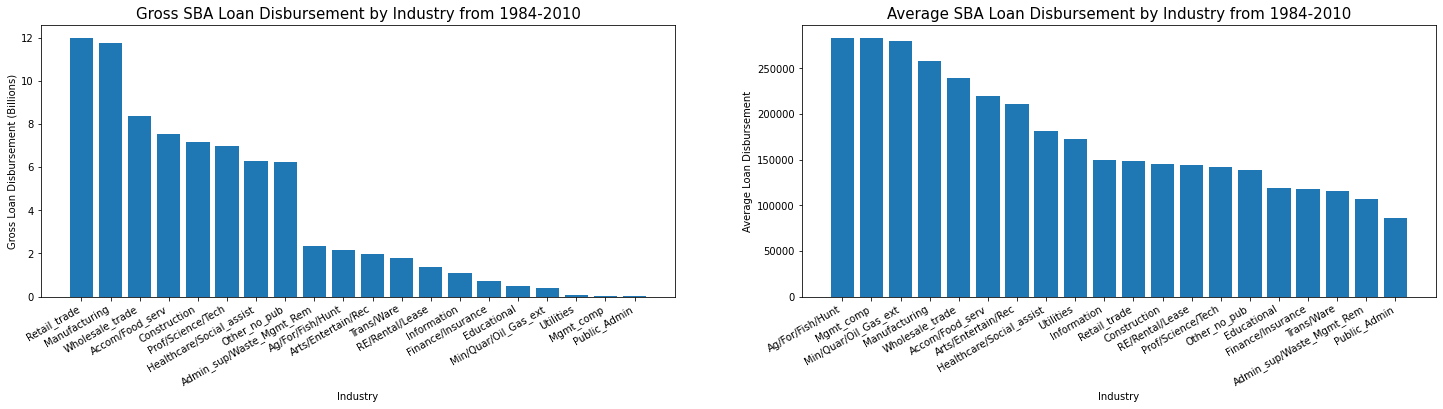

None


In [64]:

# Create a groupby object on Industry for use in visualization
industry_group = credit.groupby(['Industry'])

# Data frames based on groupby by Industry looking at aggregate and average values
credit_industrySum = industry_group.sum().sort_values('DisbursementGross', ascending=False)
credit_industryAve = industry_group.mean().sort_values('DisbursementGross', ascending=False)

# Establish figure for placing bar charts side-by-side
fig = plt.figure(figsize=(25, 5))

# Add subplots to figure to build 1x2 grid and specify position of each subplot
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

# Bar chart 1 = Gross SBA Loan Disbursement by Industry 
ax1.bar(credit_industrySum.index, credit_industrySum['DisbursementGross'] / 1000000000)
ax1.set_xticklabels(credit_industrySum.index, rotation=30, horizontalalignment='right', fontsize=10)

ax1.set_title('Gross SBA Loan Disbursement by Industry from 1984-2010', fontsize=15)
ax1.set_xlabel('Industry')
ax1.set_ylabel('Gross Loan Disbursement (Billions)')

# Bar chart 2 = Average SBA Loan Disbursement by Industry
ax2.bar(credit_industryAve.index, credit_industryAve['DisbursementGross'])
ax2.set_xticklabels(credit_industryAve.index, rotation=30, horizontalalignment='right', fontsize=10)

ax2.set_title('Average SBA Loan Disbursement by Industry from 1984-2010', fontsize=15)
ax2.set_xlabel('Industry')
ax2.set_ylabel('Average Loan Disbursement')

print(plt.show())

#### Average days to disbursement by industry

<BarContainer object of 20 artists>

[Text(0, 0, 'Ag/For/Fish/Hunt'),
 Text(0, 0, 'Public_Admin'),
 Text(0, 0, 'Mgmt_comp'),
 Text(0, 0, 'Arts/Entertain/Rec'),
 Text(0, 0, 'Healthcare/Social_assist'),
 Text(0, 0, 'Manufacturing'),
 Text(0, 0, 'Other_no_pub'),
 Text(0, 0, 'Prof/Science/Tech'),
 Text(0, 0, 'Wholesale_trade'),
 Text(0, 0, 'Accom/Food_serv'),
 Text(0, 0, 'Retail_trade'),
 Text(0, 0, 'Information'),
 Text(0, 0, 'Educational'),
 Text(0, 0, 'Construction'),
 Text(0, 0, 'Min/Quar/Oil_Gas_ext'),
 Text(0, 0, 'RE/Rental/Lease'),
 Text(0, 0, 'Utilities'),
 Text(0, 0, 'Admin_sup/Waste_Mgmt_Rem'),
 Text(0, 0, 'Finance/Insurance'),
 Text(0, 0, 'Trans/Ware')]

Text(0.5, 1.0, 'Average Days to SBA Loan Disbursement by Industry from 1984-2010')

Text(0.5, 0, 'Industry')

Text(0, 0.5, 'Average Days to Disbursement')

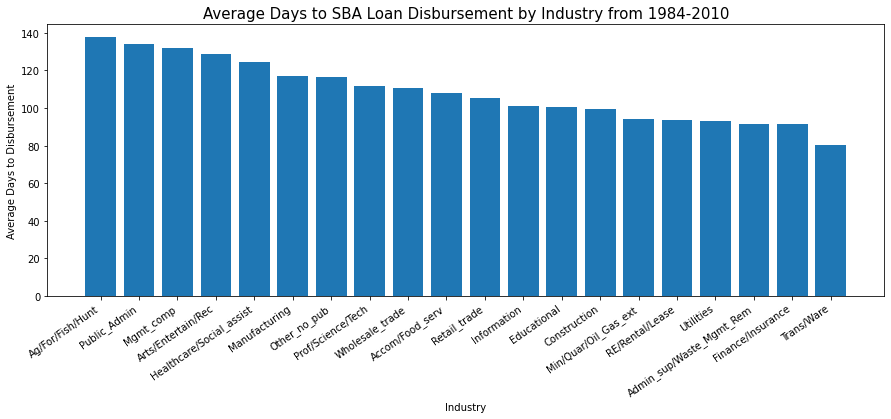

In [65]:
# Average days to disbursement by industry
fig2, ax = plt.subplots(figsize=(15, 5))

ax.bar(credit_industryAve.index, credit_industryAve['DaysToDisbursement'].sort_values(ascending=False))
ax.set_xticklabels(credit_industryAve['DaysToDisbursement'].sort_values(ascending=False).index, rotation=35,
                   horizontalalignment='right', fontsize=10)

ax.set_title('Average Days to SBA Loan Disbursement by Industry from 1984-2010', fontsize=15)
ax.set_xlabel('Industry')
ax.set_ylabel('Average Days to Disbursement')

plt.show()

### Default percentage by Industry 

In [66]:
# Check Default percentage by Industry
def_ind = credit.groupby(['Industry', 'Default'])['Industry'].count().unstack('Default')
def_ind['Def_Percent'] = def_ind[1]/ (def_ind[1] + def_ind[0])
print(def_ind)

Default                     0.0    1.0  Def_Percent
Industry                                           
Accom/Food_serv           25701   8565     0.249956
Admin_sup/Waste_Mgmt_Rem  16537   5475     0.248728
Ag/For/Fish/Hunt           6960    669     0.087692
Arts/Entertain/Rec         7311   1953     0.210816
Construction              37053  12185     0.247471
Educational                2918   1087     0.271411
Finance/Insurance          4232   2104     0.332071
Healthcare/Social_assist  30878   3627     0.105115
Information                5509   1843     0.250680
Manufacturing             38187   7343     0.161278
Mgmt_comp                    97     23     0.191667
Min/Quar/Oil_Gas_ext       1234    119     0.087953
Other_no_pub              35360   9439     0.210697
Prof/Science/Tech         39290   9911     0.201439
Public_Admin                153     30     0.163934
RE/Rental/Lease            6441   3112     0.325762
Retail_trade              61706  19246     0.237746
Trans/Ware  

### Default percentage by State

In [124]:
# Check Default percentage by State
def_state = credit.groupby(['State', 'Default'])['State'].count().unstack('Default')
def_state['Def_Percent'] = def_state[1]/(def_state[1] + def_state[0])
def_state 

Default,0.0,1.0,Def_Percent
State,,,
AK,1006,97,0.087942
AL,3299,816,0.198299
AR,2519,534,0.174910
AZ,5440,2504,0.315206
CA,45091,16296,0.265463
CO,7866,2381,0.232361
CT,5503,1074,0.163296
DC,592,158,0.210667
DE,873,249,0.221925


In [125]:
print(def_state.columns) 

Index([0.0, 1.0, 'Def_Percent'], dtype='object', name='Default')


In [126]:
df_new = def_state.values 

In [128]:
mapdf = pd.DataFrame(data = df_new, columns =['0', '1', 'Def_Percent'])

In [138]:
states_US = ["AK", "AL", "AR", "AZ", "CA", "CO", "CT", "DC", "DE", "FL", "GA", 
          "HI","IA", "ID", "IL", "IN", "KS", "KY", "LA","MA", "MD", "ME", 
          "MI", "MN", "MO", "MS", "MT","NC", "ND","NE", "NH", "NJ", 
          "NM", "NV","NY", "OH", "OK", "OR", "PA", "RI", "SC", 
          "SD", "TN", "TX", "UT", "VA","VT","WA", "WI","WV", "WY"] 

In [139]:
from pandas import DataFrame
dfstates_US = DataFrame(states_US,columns=['US_States']) 

In [140]:
mapdf['States'] = pd.DataFrame(dfstates_US) 

In [142]:
mapdf.columns

Index(['0', '1', 'Def_Percent', 'States'], dtype='object')

In [141]:
mapdf

,0,1,Def_Percent,States
0,1006.0,97.0,0.087942,AK
1,3299.0,816.0,0.198299,AL
2,2519.0,534.0,0.174910,AR
3,5440.0,2504.0,0.315206,AZ
4,45091.0,16296.0,0.265463,CA
5,7866.0,2381.0,0.232361,CO
6,5503.0,1074.0,0.163296,CT
7,592.0,158.0,0.210667,DC
8,873.0,249.0,0.221925,DE
9,15469.0,7641.0,0.330636,FL


In [1]:
import plotly.graph_objects as go



fig = go.Figure(data=go.Choropleth(
    locations= mapdf['States'], # Spatial coordinates
    z = mapdf['Def_Percent'].astype(float), # Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`
    colorscale = 'Reds',
    colorbar_title = "Percentage of Default",
))

fig.update_layout(
    title_text = 'Rate of Default by State',
    geo_scope='usa', # limite map scope to USA
)



NameError: ignored

### Paid in full and defaulted loans

[Text(0, 0, 'Accom/Food_serv'),
 Text(0, 0, 'Admin_sup/Waste_Mgmt_Rem'),
 Text(0, 0, 'Ag/For/Fish/Hunt'),
 Text(0, 0, 'Arts/Entertain/Rec'),
 Text(0, 0, 'Construction'),
 Text(0, 0, 'Educational'),
 Text(0, 0, 'Finance/Insurance'),
 Text(0, 0, 'Healthcare/Social_assist'),
 Text(0, 0, 'Information'),
 Text(0, 0, 'Manufacturing'),
 Text(0, 0, 'Mgmt_comp'),
 Text(0, 0, 'Min/Quar/Oil_Gas_ext'),
 Text(0, 0, 'Other_no_pub'),
 Text(0, 0, 'Prof/Science/Tech'),
 Text(0, 0, 'Public_Admin'),
 Text(0, 0, 'RE/Rental/Lease'),
 Text(0, 0, 'Retail_trade'),
 Text(0, 0, 'Trans/Ware'),
 Text(0, 0, 'Utilities'),
 Text(0, 0, 'Wholesale_trade')]

Text(0.5, 1.0, 'Number of PIF/Defaulted Loans by Industry from 1984-2010')

Text(0.5, 0, 'Industry')

Text(0, 0.5, 'Number of PIF/Defaulted Loans')

Text(0.5, 1.0, 'Number of PIF/Defaulted Loans by State from 1984-2010')

Text(0.5, 0, 'State')

Text(0, 0.5, 'Number of PIF/Defaulted Loans')

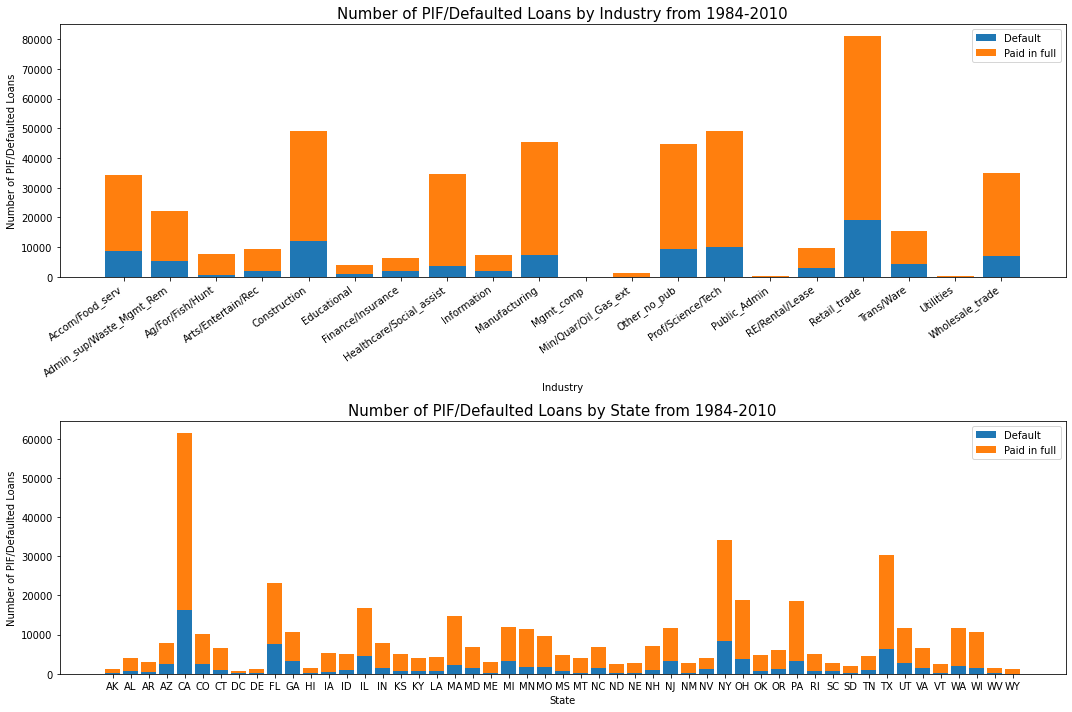

In [68]:
# Paid in full and defaulted loans
fig3 = plt.figure(figsize=(15, 10))

ax1a = plt.subplot(2, 1, 1)
ax2a = plt.subplot(2, 1, 2)

# Function for creating stacked bar charts grouped by desired column
# df = original data frame, col = x-axis grouping, stack_col = column to show stacked values
# Essentially acts as a stacked histogram when stack_col is a flag variable
def stacked_setup(df, col, axes, stack_col='Default'):
    data = df.groupby([col, stack_col])[col].count().unstack(stack_col)
    data.fillna(0)

    axes.bar(data.index, data[1], label='Default')
    axes.bar(data.index, data[0], bottom=data[1], label='Paid in full')


# Number of Paid in full and defaulted loans by industry
stacked_setup(df=credit, col='Industry', axes=ax1a)
ax1a.set_xticklabels(credit.groupby(['Industry', 'Default'])['Industry'].count().unstack('Default').index,
                     rotation=35, horizontalalignment='right', fontsize=10)

ax1a.set_title('Number of PIF/Defaulted Loans by Industry from 1984-2010', fontsize=15)
ax1a.set_xlabel('Industry')
ax1a.set_ylabel('Number of PIF/Defaulted Loans')
ax1a.legend()

# Number of Paid in full and defaulted loans by State
stacked_setup(df=credit, col='State', axes=ax2a)

ax2a.set_title('Number of PIF/Defaulted Loans by State from 1984-2010', fontsize=15)
ax2a.set_xlabel('State')
ax2a.set_ylabel('Number of PIF/Defaulted Loans')
ax2a.legend()

plt.tight_layout()
plt.show()

### Paid in full and Defaulted loans by DisbursementFY

Text(0.5, 1.0, 'Number of PIF/Defaulted Loans by State from 1984-2010')

Text(0.5, 0, 'Disbursement Year')

Text(0, 0.5, 'Number of PIF/Defaulted Loans')

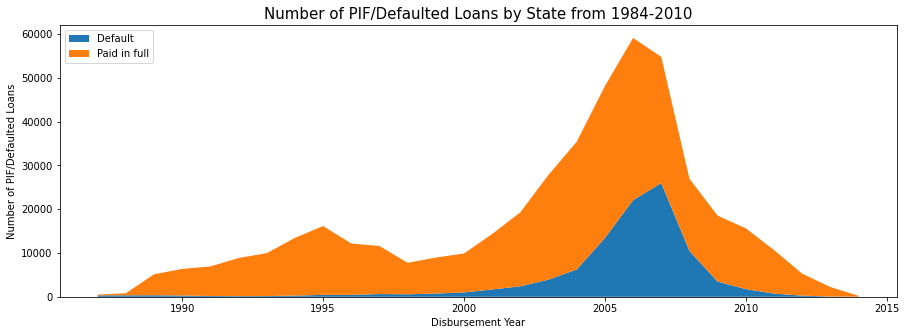

In [73]:
# Paid in full and Defaulted loans by DisbursementFY
# Decided to use a stacked area chart here since it's time series data
fig4, ax4 = plt.subplots(figsize=(15, 5))

stack_data = credit.groupby(['DisbursementFY', 'Default'])['DisbursementFY'].count().unstack('Default')
x = stack_data.index 
y = [stack_data[1], stack_data[0]]

ax4.stackplot(x, y, labels=['Default', 'Paid in full'])
ax4.set_title('Number of PIF/Defaulted Loans by State from 1984-2010', fontsize=15)
ax4.set_xlabel('Disbursement Year')
ax4.set_ylabel('Number of PIF/Defaulted Loans')
ax4.legend(loc='upper left')

plt.show()

<h1>Create a Heatmap</h1>

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5,
        22.5, 23.5, 24.5]), <a list of 25 Text major ticklabel objects>)

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5,
        22.5, 23.5, 24.5]), <a list of 25 Text major ticklabel objects>)

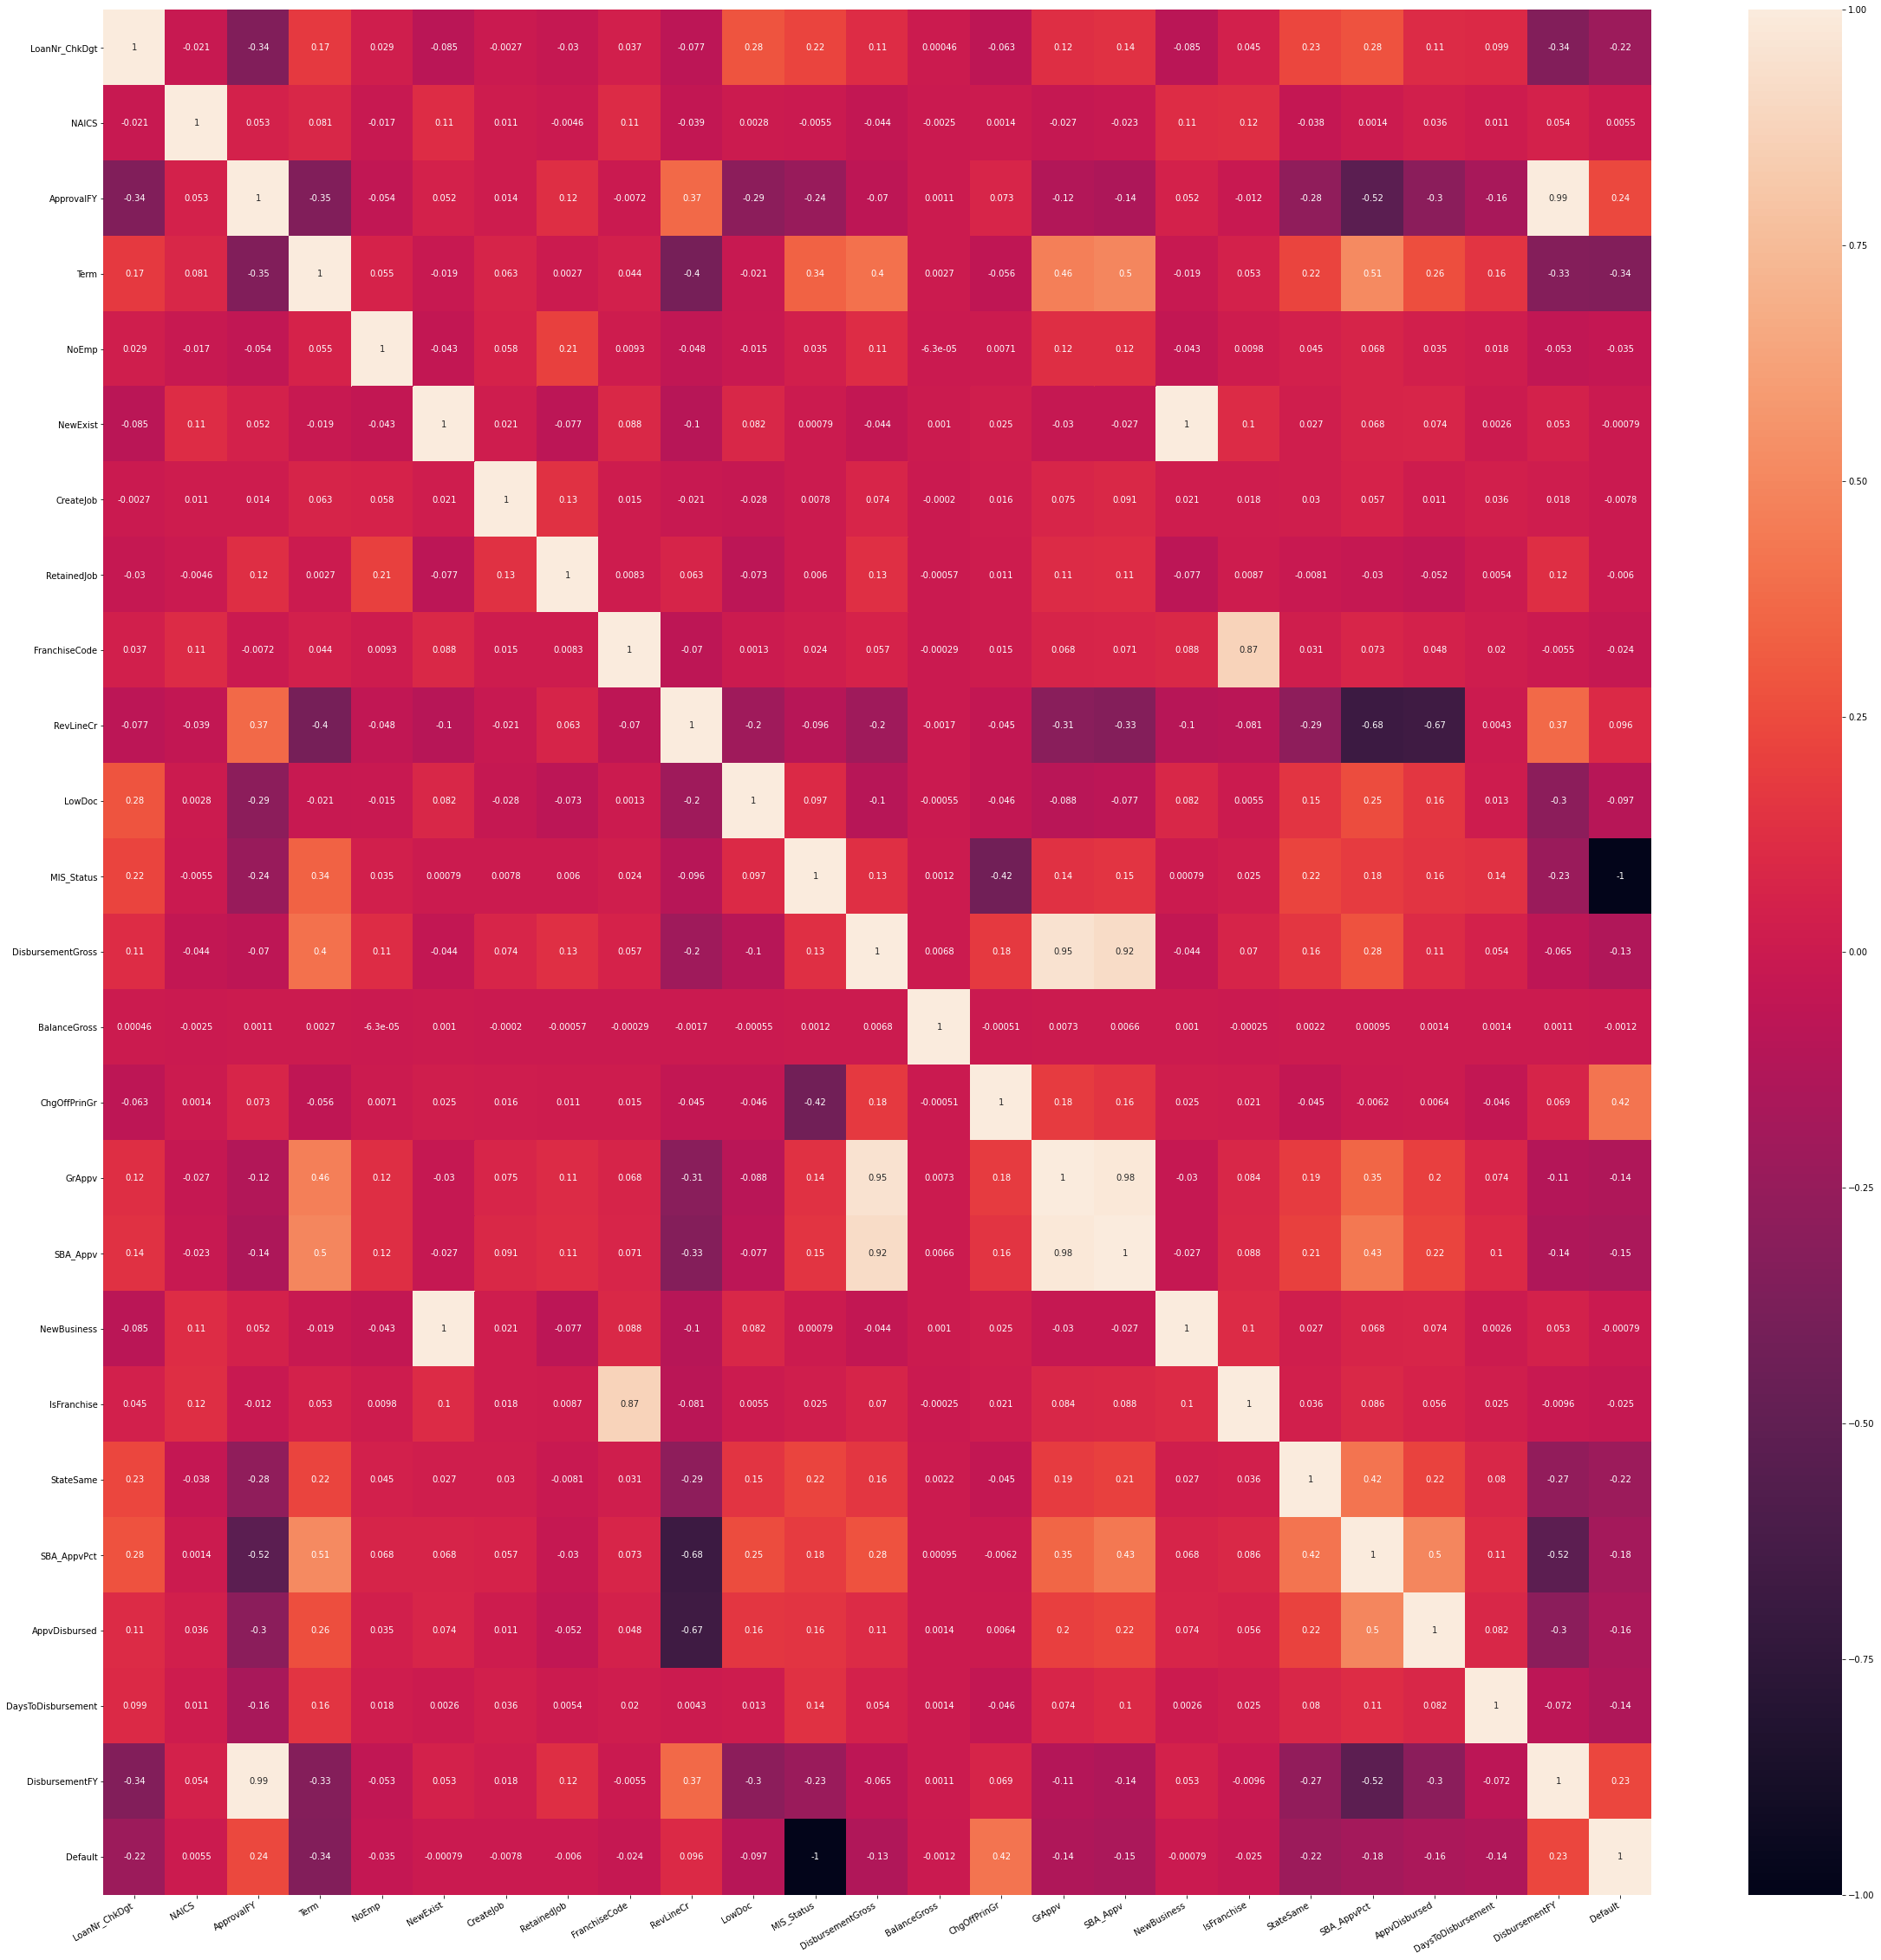

In [70]:
cor_fig, cor_ax = plt.subplots(figsize=(40, 40))
corr_matrix = credit.corr()
cor_ax = sns.heatmap(corr_matrix, annot=True)
plt.xticks(rotation=30, horizontalalignment='right', fontsize=10)
plt.yticks(fontsize=10)
#plt.axes(autoscaley_on = True, clip_on = False)
plt.show()

In [71]:
corr = credit.corr()
corr.style.background_gradient(cmap='coolwarm')

,LoanNr_ChkDgt,NAICS,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,RevLineCr,LowDoc,MIS_Status,DisbursementGross,BalanceGross,ChgOffPrinGr,GrAppv,SBA_Appv,NewBusiness,IsFranchise,StateSame,SBA_AppvPct,AppvDisbursed,DaysToDisbursement,DisbursementFY,Default
LoanNr_ChkDgt,1.000000,-0.021197,-0.343801,0.172931,0.028611,-0.085001,-0.002702,-0.030171,0.037114,-0.076553,0.284122,0.223978,0.111391,0.000458,-0.063241,0.124692,0.135678,-0.085001,0.045040,0.233443,0.280430,0.109246,0.098913,-0.337849,-0.223978
NAICS,-0.021197,1.000000,0.052858,0.080894,-0.017009,0.112673,0.010847,-0.004636,0.109083,-0.039073,0.002824,-0.005495,-0.044031,-0.002518,0.001421,-0.026692,-0.022778,0.112673,0.122197,-0.037842,0.001388,0.035516,0.011006,0.053972,0.005495
ApprovalFY,-0.343801,0.052858,1.000000,-0.345125,-0.054345,0.052378,0.014383,0.120987,-0.007210,0.367651,-0.293311,-0.240330,-0.070047,0.001138,0.072612,-0.117238,-0.144397,0.052378,-0.011682,-0.277167,-0.524430,-0.303116,-0.164709,0.993571,0.240330
Term,0.172931,0.080894,-0.345125,1.000000,0.055173,-0.018533,0.063198,0.002654,0.044291,-0.396169,-0.021281,0.339963,0.399191,0.002734,-0.055869,0.461146,0.496434,-0.018533,0.053416,0.221469,0.513322,0.264149,0.155944,-0.333389,-0.339963
NoEmp,0.028611,-0.017009,-0.054345,0.055173,1.000000,-0.042799,0.058441,0.206373,0.009291,-0.048011,-0.014797,0.034721,0.113772,-0.000063,0.007092,0.117544,0.118380,-0.042799,0.009816,0.044972,0.068450,0.035369,0.018282,-0.053281,-0.034721
NewExist,-0.085001,0.112673,0.052378,-0.018533,-0.042799,1.000000,0.021466,-0.076591,0.087741,-0.101551,0.082086,0.000787,-0.043567,0.001044,0.025208,-0.029503,-0.027367,1.000000,0.102490,0.026617,0.068276,0.073701,0.002559,0.052710,-0.000787
CreateJob,-0.002702,0.010847,0.014383,0.063198,0.058441,0.021466,1.000000,0.133481,0.015073,-0.020555,-0.028090,0.007761,0.074337,-0.000202,0.015981,0.075342,0.090917,0.021466,0.018141,0.029815,0.057252,0.011479,0.036030,0.018398,-0.007761
RetainedJob,-0.030171,-0.004636,0.120987,0.002654,0.206373,-0.076591,0.133481,1.000000,0.008315,0.062803,-0.073452,0.006026,0.125973,-0.000570,0.011163,0.106336,0.110257,-0.076591,0.008682,-0.008054,-0.030311,-0.052265,0.005429,0.123098,-0.006026
FranchiseCode,0.037114,0.109083,-0.007210,0.044291,0.009291,0.087741,0.015073,0.008315,1.000000,-0.070268,0.001336,0.023540,0.056736,-0.000291,0.015477,0.068333,0.071366,0.087741,0.872769,0.030835,0.073345,0.048264,0.020356,-0.005506,-0.023540
RevLineCr,-0.076553,-0.039073,0.367651,-0.396169,-0.048011,-0.101551,-0.020555,0.062803,-0.070268,1.000000,-0.204278,-0.095505,-0.204549,-0.001710,-0.045338,-0.306484,-0.331637,-0.101551,-0.081165,-0.285954,-0.680724,-0.670021,0.004331,0.371049,0.095505


<h1>Create a PairPlot</h1>

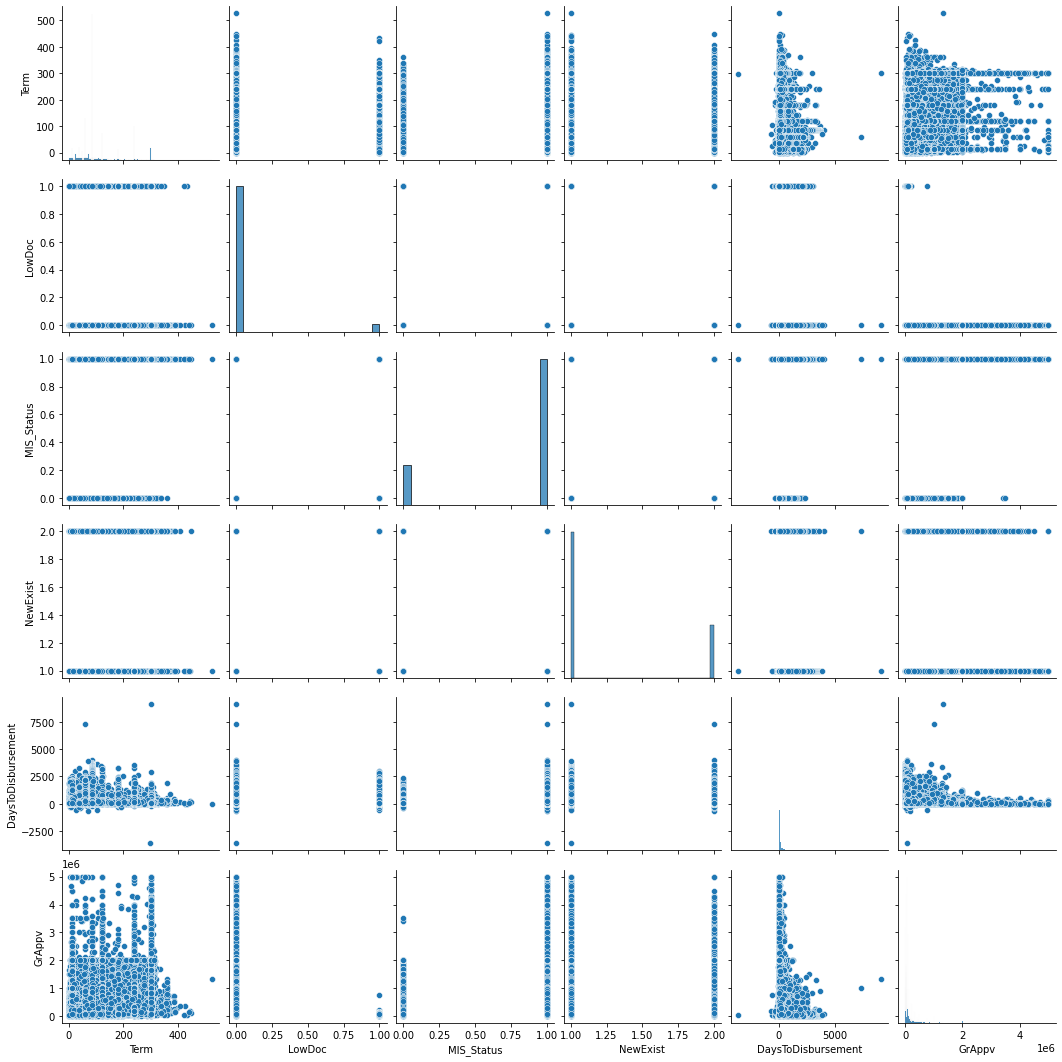

In [72]:
# Create a PairPlot

credit_subset = credit[['Term','LowDoc','MIS_Status','NewExist',\
                        'DaysToDisbursement','GrAppv']]
credit_pairplot = sns.pairplot(credit_subset)
credit_pairplot

# Modeling

In [75]:
credit.head()

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,DisbursementDate,MIS_Status,nIndustry,Industry,DisbursementGross,BalanceGross,ChgOffPrinGr,GrAppv,SBA_Appv,NewBusiness,IsFranchise,StateSame,SBA_AppvPct,AppvDisbursed,DaysToDisbursement,DisbursementFY,Default
0,1000014003,ABC HOBBYCRAFT,EVANSVILLE,IN,47711,FIFTH THIRD BANK,OH,451120,1997-02-28,1997,84,4,2,0,0,1,0,0,1,1999-02-28,1,45,Retail_trade,60000.0,0.0,0.0,60000.0,48000.0,1,0,0,0.80,1,730,1999,0.0
1,1000024006,LANDMARK BAR & GRILLE (THE),NEW PARIS,IN,46526,1ST SOURCE BANK,IN,722410,1997-02-28,1997,60,2,2,0,0,1,0,0,1,1997-05-31,1,72,Accom/Food_serv,40000.0,0.0,0.0,40000.0,32000.0,1,0,1,0.80,1,92,1997,0.0
2,1000034009,"WHITLOCK DDS, TODD M.",BLOOMINGTON,IN,47401,GRANT COUNTY STATE BANK,IN,621210,1997-02-28,1997,180,7,1,0,0,1,0,0,0,1997-12-31,1,62,Healthcare/Social_assist,287000.0,0.0,0.0,287000.0,215250.0,0,0,1,0.75,1,306,1997,0.0
5,1000084002,"B&T SCREW MACHINE COMPANY, INC",PLAINVILLE,CT,6062,"TD BANK, NATIONAL ASSOCIATION",DE,332721,1997-02-28,1997,120,19,1,0,0,1,0,0,0,1997-06-30,1,33,Manufacturing,517000.0,0.0,0.0,517000.0,387750.0,0,0,0,0.75,1,122,1997,0.0
7,1000094005,WEAVER PRODUCTS,SUMMERFIELD,FL,34491,REGIONS BANK,AL,811118,1997-02-28,1997,84,1,2,0,0,1,0,0,1,1998-06-30,1,81,Other_no_pub,45000.0,0.0,0.0,45000.0,36000.0,1,0,0,0.80,1,487,1998,0.0


In [74]:
#running logistics regression and svm
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC 
from sklearn.model_selection import train_test_split   

In [ ]:
#input data for modeling
cols=['Term','NoEmp','NewExist','CreateJob','RetainedJob', 'UrbanRural', 'RevLineCr',
'LowDoc','Industry','DisbursementGross','NewBusiness','IsFranchise','StateSame','SBA_AppvPct',
'DaysToDisbursement','DisbursementFY'] 

X=credit[cols]
y=credit['Default']   


In [ ]:
y.head()

0    0.0
1    0.0
2    0.0
5    0.0
7    0.0
Name: Default, dtype: float64

In [ ]:
X.head()

,Term,NoEmp,NewExist,CreateJob,RetainedJob,UrbanRural,RevLineCr,LowDoc,Industry,DisbursementGross,NewBusiness,IsFranchise,StateSame,SBA_AppvPct,DaysToDisbursement,DisbursementFY
0,84,4,2,0,0,0,0,1,Retail_trade,60000.0,1,0,0,0.80,730,1999
1,60,2,2,0,0,0,0,1,Accom/Food_serv,40000.0,1,0,1,0.80,92,1997
2,180,7,1,0,0,0,0,0,Healthcare/Social_assist,287000.0,0,0,1,0.75,306,1997
5,120,19,1,0,0,0,0,0,Manufacturing,517000.0,0,0,0,0.75,122,1997
7,84,1,2,0,0,0,0,1,Other_no_pub,45000.0,1,0,0,0.80,487,1998


In [ ]:
X = pd.get_dummies(X)

In [ ]:
X.head()

,Term,NoEmp,NewExist,CreateJob,RetainedJob,RevLineCr,LowDoc,DisbursementGross,NewBusiness,IsFranchise,StateSame,SBA_AppvPct,DaysToDisbursement,DisbursementFY,UrbanRural_0,UrbanRural_1,UrbanRural_2,Industry_Accom/Food_serv,Industry_Admin_sup/Waste_Mgmt_Rem,Industry_Ag/For/Fish/Hunt,Industry_Arts/Entertain/Rec,Industry_Construction,Industry_Educational,Industry_Finance/Insurance,Industry_Healthcare/Social_assist,Industry_Information,Industry_Manufacturing,Industry_Mgmt_comp,Industry_Min/Quar/Oil_Gas_ext,Industry_Other_no_pub,Industry_Prof/Science/Tech,Industry_Public_Admin,Industry_RE/Rental/Lease,Industry_Retail_trade,Industry_Trans/Ware,Industry_Utilities,Industry_Wholesale_trade
0,84,4,2,0,0,0,1,60000.0,1,0,0,0.80,730,1999,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,60,2,2,0,0,0,1,40000.0,1,0,1,0.80,92,1997,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,180,7,1,0,0,0,0,287000.0,0,0,1,0.75,306,1997,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
5,120,19,1,0,0,0,0,517000.0,0,0,0,0.75,122,1997,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
7,84,1,2,0,0,0,1,45000.0,1,0,0,0.80,487,1998,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [ ]:
X.skew() 

Term                                   1.508794
NoEmp                                 90.685105
NewExist                               1.064603
CreateJob                            185.157525
RetainedJob                           71.249216
RevLineCr                              0.323957
LowDoc                                 3.906512
DisbursementGross                      5.345240
NewBusiness                            1.064603
IsFranchise                            5.391581
StateSame                              0.173159
SBA_AppvPct                            0.521730
DaysToDisbursement                     6.061549
DisbursementFY                        -0.831780
UrbanRural_0                           1.235407
UrbanRural_1                          -0.516115
UrbanRural_2                           2.101267
Industry_Accom/Food_serv               3.227417
Industry_Admin_sup/Waste_Mgmt_Rem      4.220119
Industry_Ag/For/Fish/Hunt              7.544037
Industry_Arts/Entertain/Rec            6

### Splitting the dataset into the Training set and Test set

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0) 

### Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

###  Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier_log = LogisticRegression(random_state = 0)
logreg = classifier_log.fit(X_train, y_train) 

In [ ]:
y_pred_log = classifier_log.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm_log = confusion_matrix(y_test, y_pred_log)
print(cm_log)
accuracy_score(y_test, y_pred_log)  

[[85079  4595]
 [13004 11557]]


0.8459403860463081

In [ ]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
print('Precision score: {:.4f}'.format(precision_score(y_test,y_pred_log)))
print('Recall score: {:.4f}'.format(recall_score(y_test,y_pred_log)))
print('Accuracy score: {:.4f}'.format(accuracy_score(y_test,y_pred_log)))
print('F1 score: {:.4f}'.format(f1_score(y_test,y_pred_log))) 

Precision score: 0.7155
Recall score: 0.4705
Accuracy score: 0.8459
F1 score: 0.5677


In [ ]:
print("lr.coef_:", logreg.coef_)
print("lr.intercept_:", logreg.intercept_) 
print("Training set score: {:.3f}".format(logreg.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg.score(X_test, y_test)))  

lr.coef_: [[-2.55512788e+00 -3.51423678e-01 -1.85517551e-03  2.51625830e-02
  -1.33725219e-01 -2.21281269e-01 -1.34693926e-01 -4.49784489e-02
  -1.85517551e-03 -1.75544199e-02 -5.32944638e-01  3.74121874e-01
  -4.13503552e-01  2.19090062e-01 -3.83428813e-01  2.70923653e-01
   9.21406467e-02  1.03286483e-01 -9.53593282e-03 -8.11506549e-02
   4.27917856e-02  5.85769606e-03  1.02212798e-02  4.22109304e-02
  -1.45137586e-01  2.36544442e-03 -6.69638156e-02  5.61517915e-03
  -5.42199598e-02  4.59562025e-02 -4.92750561e-02 -2.40258690e-03
   7.34663502e-02  9.24314750e-02 -8.38238756e-03 -5.63631411e-03
  -3.74344112e-02]]
lr.intercept_: [-2.61357901]
Training set score: 0.845
Test set score: 0.846


In [ ]:
print( sklearn.metrics.classification_report(y_test,y_pred_log) )

              precision    recall  f1-score   support

         0.0       0.87      0.95      0.91     89674
         1.0       0.72      0.47      0.57     24561

    accuracy                           0.85    114235
   macro avg       0.79      0.71      0.74    114235
weighted avg       0.83      0.85      0.83    114235



### Linear SVC 

In [ ]:
from sklearn.svm import SVC 
classifier_svm = SVC(kernel = 'rbf', random_state = 0) 
classifier_svm.fit(X_train, y_train)   

In [ ]:
y_pred_svm = classifier_svm.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm_svm = confusion_matrix(y_test, y_pred_svm)
print(cm_svm)
accuracy_score(y_test, y_pred_svm)  

[[2212  720]
 [ 703 7922]]


0.8768711603357273

In [ ]:
print( sklearn.metrics.classification_report(y_test,y_pred_svm))

In [ ]:
#Grid Search for SVM model and tuning both C and gamma
from sklearn.model_selection import GridSearchCV
parameters = [{'C': [0.25, 0.5, 0.75, 1,10,100], 'kernel': ['linear']},
              {'C': [0.25, 0.5, 0.75, 1, 10,100], 'kernel': ['rbf'], 'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9,0.001,1,10]}]
grid_search = GridSearchCV(estimator = classifier_svm,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)
grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)

### XGBoost 

In [ ]:
from xgboost import XGBClassifier
classifier_XGB = XGBClassifier()
classifier_XGB.fit(X_train, y_train) 

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred_XGB = classifier_XGB.predict(X_test)
cm_XGB = confusion_matrix(y_test, y_pred_XGB)
print(cm_XGB)
accuracy_score(y_test, y_pred_XGB)


[[86544  3130]
 [ 4430 20131]]


0.9338206329058519

####Applying K fold Cross Validation to XGBoost model

In [ ]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier_XGB, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100)) 

Accuracy: 93.38 %
Standard Deviation: 0.09 %


In [ ]:
# List the importance of each feature
for name, importance in sorted(zip(X.columns, classifier_XGB.feature_importances_)):
    print(name, "=", importance)

CreateJob = 0.0
DaysToDisbursement = 0.05976651
DisbursementFY = 0.10447113
DisbursementGross = 0.027008168
Industry_Accom/Food_serv = 0.015161393
Industry_Admin_sup/Waste_Mgmt_Rem = 0.0
Industry_Ag/For/Fish/Hunt = 0.0
Industry_Arts/Entertain/Rec = 0.0
Industry_Construction = 0.0
Industry_Educational = 7.0970615e-05
Industry_Finance/Insurance = 0.0
Industry_Healthcare/Social_assist = 0.020701556
Industry_Information = 0.0
Industry_Manufacturing = 0.0
Industry_Mgmt_comp = 0.0
Industry_Min/Quar/Oil_Gas_ext = 0.0
Industry_Other_no_pub = 0.0
Industry_Prof/Science/Tech = 0.0
Industry_Public_Admin = 0.0
Industry_RE/Rental/Lease = 0.0
Industry_Retail_trade = 0.016442629
Industry_Trans/Ware = 0.0
Industry_Utilities = 0.0
Industry_Wholesale_trade = 0.00048270525
IsFranchise = 0.0
LowDoc = 0.014909268
NewBusiness = 0.0
NewExist = 0.0049799955
NoEmp = 0.01717324
RetainedJob = 0.002352324
RevLineCr = 0.02032678
SBA_AppvPct = 0.033158097
StateSame = 0.22771351
Term = 0.18138014
UrbanRural_0 = 0.113